In [1]:
import time
start_time=time.time()

In [2]:
import sys
from pathlib import Path
import json
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'MUSE-Dor-H.fits'

In [8]:
name_export='MUSE-Dor-H'

In [9]:
hdulist = fits.open(str(datapath_obs)+'/'+data_file)

In [10]:
dist = 50000 #parsecs
pix = 0.2 #arcsec
seeing = 0.9 #seeing arcsec FWHM

In [11]:
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(0.24240684055476797, 0.09263955689991132)

In [12]:
n = None
sb = hdulist[1].data[:n, :n].astype(np.float64)
vv = hdulist[2].data[:n, :n].astype(np.float64)
ss = hdulist[3].data[:n, :n].astype(np.float64)

In [13]:
## Replace spurious values in the arrays
m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)

sb[m] = 0.0
vv[m] = np.nanmean(vv)
ss[m] = 0.0
sb /= sb.max()

good = (~m) & (sb > 0.001)

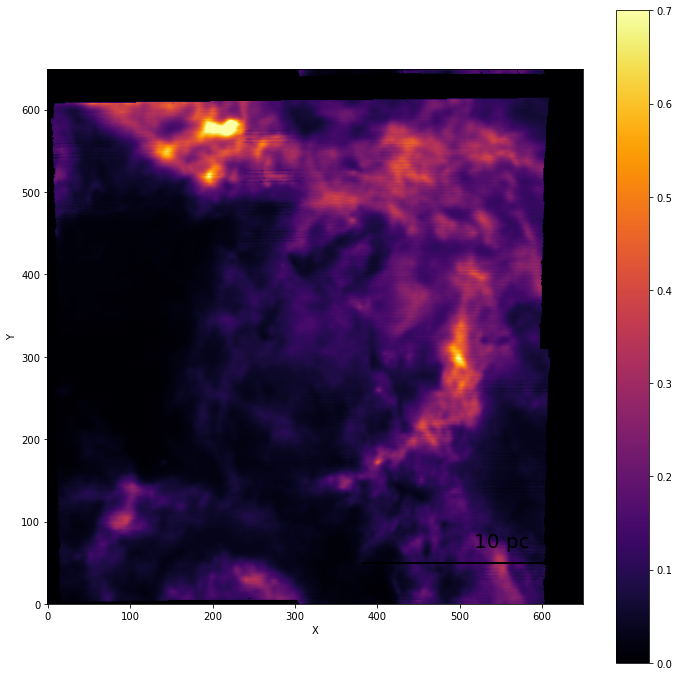

In [14]:
fig, ax = plt.subplots(figsize=(12, 12))


dataI=sb

plt.figure(1)
plt.imshow(dataI, cmap='inferno')

cbar = plt.colorbar()
plt.clim(0.0,0.7)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [15]:
dffx=pd.DataFrame(sb)

In [16]:
dffx=dffx.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})

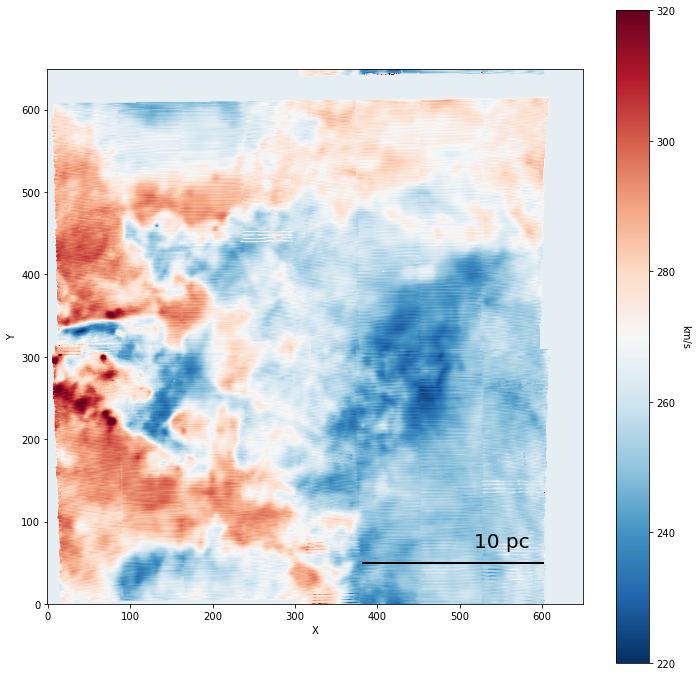

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))


dataRV=vv

plt.figure(1)
plt.imshow(dataRV, cmap='RdBu_r')

cbar = plt.colorbar()
plt.clim(220,320)
cbar.set_label('km/s', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [18]:
RV=pd.DataFrame(vv)

In [19]:
RV=RV.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})

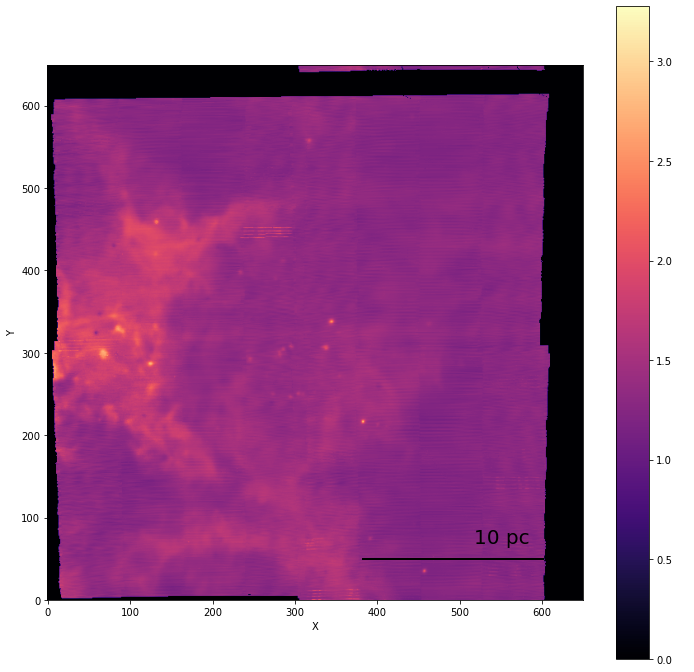

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))


dataS=ss

plt.figure(1)
plt.imshow(dataS, cmap='magma')

cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [21]:
dsig=pd.DataFrame(ss)

In [22]:
dsig=dsig.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})

In [23]:
data=RV
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

,X,Y,RV,I,Sig
count,422500.000000,422500.000000,422500.000000,422500.000000,422500.000000
mean,324.500000,324.500000,265.559633,0.095114,1.196145
std,187.638837,187.638837,14.738566,0.100718,0.507896
min,0.000000,0.000000,91.565124,0.000000,0.000000
25%,162.000000,162.000000,255.228089,0.016390,1.250302
50%,324.500000,324.500000,265.559633,0.063551,1.321414
75%,487.000000,487.000000,274.455725,0.139912,1.424054
max,649.000000,649.000000,610.812809,1.000000,3.276301


In [24]:
mI=data.I>0

In [25]:
data[mI].describe()

,X,Y,RV,I,Sig
count,363059.000000,363059.000000,363059.000000,363059.000000,363059.000000
mean,308.397299,308.519841,265.559633,0.110686,1.391981
std,177.168769,171.174137,15.899375,0.100405,0.166107
min,0.000000,5.000000,91.565124,0.000054,0.780110
25%,156.000000,160.000000,253.588414,0.037486,1.282004
50%,307.000000,310.000000,264.409625,0.079233,1.343240
75%,462.000000,457.000000,276.422219,0.156739,1.448541
max,649.000000,609.000000,610.812809,1.000000,3.276301


Text(0.5, 6.79999999999999, 'Radial velocity [km/s]')

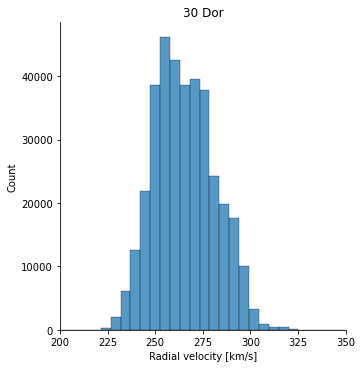

In [26]:
#sns.displot(RV[0]-RV[0].mean(),bins=100)
sns.displot(data[mI].RV,bins=100)

plt.xlim(200,350)

#plt.text(0.75, 1.15,'n ='+str(RV[0].count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.80, 0.82,'$μ$ ='+str(np.round(RV[0].mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.85, 1.25,'$σ^{2}$ ='+str(np.round(RV[0].var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('30 Dor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.xlabel('Radial velocity [km/s]')

In [27]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
         name_export : np.array(data[mI]),
      }
data_export_list

{'name': 'MUSE-Dor-H',
 'pc': 0.24240684055476797,
 's0': 0.09263955689991132,
 'pix': 0.2,
 'MUSE-Dor-H': array([[0.00000000e+00, 3.06000000e+02, 2.71013497e+02, 1.31409205e-01,
         1.27799045e+00],
        [0.00000000e+00, 3.07000000e+02, 2.73394009e+02, 1.26745972e-01,
         1.33748688e+00],
        [0.00000000e+00, 3.08000000e+02, 2.76240517e+02, 1.08469526e-01,
         1.33190707e+00],
        ...,
        [6.49000000e+02, 6.00000000e+02, 2.59203970e+02, 7.95155728e-02,
         1.25776195e+00],
        [6.49000000e+02, 6.01000000e+02, 2.58594459e+02, 8.00766838e-02,
         1.23716500e+00],
        [6.49000000e+02, 6.02000000e+02, 2.60029059e+02, 7.71276247e-02,
         1.28599584e+00]])}

In [28]:
n = None

data_export_matrix = {
       'name': name_export, 
       'pc' : pc,
       's0' : s0,
       'pix' : pix,
       'sb' :np.array(hdulist[1].data[:n, :n].astype(np.float64)),
       'vv' : np.array(hdulist[2].data[:n, :n].astype(np.float64)),
       'ss' : np.array(hdulist[3].data[:n, :n].astype(np.float64)),

      }

data_export_matrix

{'name': 'MUSE-Dor-H',
 'pc': 0.24240684055476797,
 's0': 0.09263955689991132,
 'pix': 0.2,
 'sb': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'vv': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'ss': array([[0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        ...,
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68]])}

In [29]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [30]:
jsonfilename =name_export +"-m.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_matrix, fp=f, indent=3, cls=MyEncoder)

In [31]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [32]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 16.164724349975586 seconds ---


In [33]:
!jupyter nbconvert --to script --no-prompt otv-MUSE-Dor-H.ipynb

[NbConvertApp] Converting notebook otv-MUSE-Dor-H.ipynb to script
[NbConvertApp] Writing 5044 bytes to otv-MUSE-Dor-H.py
